In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [87]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [88]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [89]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [90]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [91]:
Y = df['b_labels'].values
X = df['data'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

print('Example of sentences:')
X_train[0:5]

X_train shape: (3733,)
Y_train shape: (3733,)
X_test shape: (1839,)
Y_test shape: (1839,)
Example of sentences:


array(['I sent you  &lt;#&gt;  bucks',
       'Thank you princess! You are so sexy...',
       'Dear,regret i cudnt pick call.drove down frm ctla now at cochin home.left mobile in car..ente style ishtamayoo?happy bakrid!',
       'Wat r u doing now?', 'Cold. Dont be sad dear'], dtype=object)

In [92]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print('Example of word index sequences:')
X_train_seq[0:5]

Example of word index sequences:


[[1, 210, 3, 47, 46, 1262],
 [445, 3, 402, 3, 21, 23, 494],
 [121,
  1767,
  1,
  3344,
  176,
  15,
  3345,
  230,
  700,
  3346,
  22,
  27,
  2230,
  91,
  380,
  88,
  9,
  353,
  3347,
  1446,
  3348,
  112,
  3349],
 [140, 97, 6, 152, 22],
 [1263, 87, 39, 590, 121]]

In [93]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7213 unique tokens.


In [94]:
X_train_padded = pad_sequences(X_train_seq)
print('X_train_padded shape:', X_train_padded.shape)
T = X_train_padded.shape[1]
print('Max sequence lenght of train data:', T)
X_test_padded = pad_sequences(X_test_seq, maxlen=T)
print('X_test_padded shape:', X_test_padded.shape)

X_train_padded shape: (3733, 189)
Max sequence lenght of train data: 189
X_test_padded shape: (1839, 189)


In [96]:
D = 20 # embedding dimentionality

i = Input((T,))
x = Embedding(V + 1, D)(i)
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_padded, Y_train, epochs=10, validation_data=(X_test_padded, Y_test))

Epoch 1/10
117/117 [==============================] - 11s 80ms/step - loss: 0.4762 - accuracy: 0.8489 - val_loss: 0.3352 - val_accuracy: 0.8820
Epoch 2/10
117/117 [==============================] - 9s 76ms/step - loss: 0.3136 - accuracy: 0.8580 - val_loss: 0.2227 - val_accuracy: 0.8820
Epoch 3/10
117/117 [==============================] - 9s 76ms/step - loss: 0.2019 - accuracy: 0.9164 - val_loss: 0.1585 - val_accuracy: 0.9799
Epoch 4/10
117/117 [==============================] - 9s 74ms/step - loss: 0.1364 - accuracy: 0.9901 - val_loss: 0.1135 - val_accuracy: 0.9886
Epoch 5/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0891 - accuracy: 0.9941 - val_loss: 0.0814 - val_accuracy: 0.9880
Epoch 6/10
117/117 [==============================] - 9s 78ms/step - loss: 0.0556 - accuracy: 0.9968 - val_loss: 0.0644 - val_accuracy: 0.9897
Epoch 7/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0375 - accuracy: 0.9979 - val_loss: 0.0558 - val_accuracy: 0.989

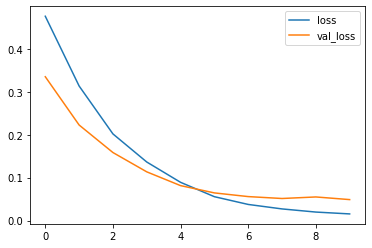

In [97]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

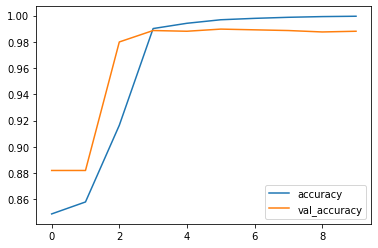

In [98]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()